In [2]:
import numpy as np
import matplotlib.pylab as plt
from dmp import DMPs_discrete, ImprovedFormulation

In [3]:
d = DMPs_discrete(dims=1, bfs=10, ts=ImprovedFormulation(),dt=0.001)

In [4]:
y_track, dy_track, ddy_track = d.plan()

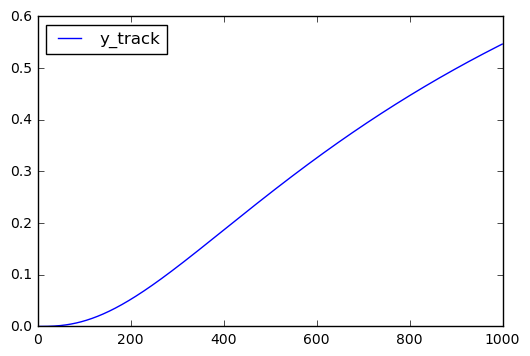

In [5]:
plt.figure('y_track')
plt.plot(y_track, label='y_track')
plt.legend(loc='upper left')
plt.show()

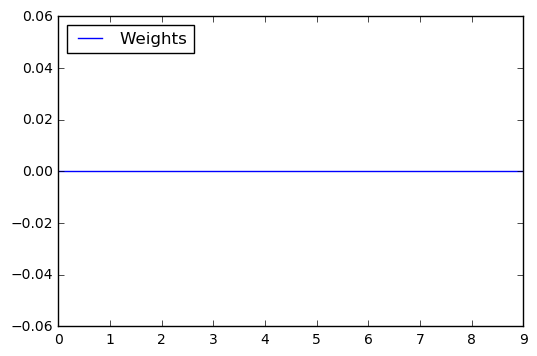

In [6]:
plt.figure('weight')
plt.plot(range(d.w.T.shape[0]), d.w.T, label='Weights')
#plt.bar(range(d.w.T.shape[0]), d.w.T, label='Weighted summation')
plt.legend(loc='upper left')
plt.show()

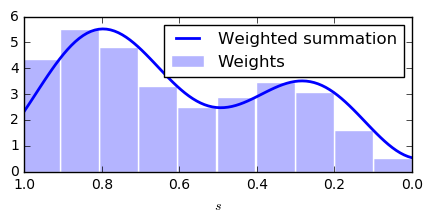

In [17]:
# src: http://blogs.mathworks.com/loren/2011/01/13/data-driven-fitting/
X = np.linspace(1, 10, 100)

# Specify the parameters for a second order Fourier series
w  =  0.6
a0 =  3.0
a1 = -0.6
b1 = -1.3
a2 = -1.1
b2 = -0.9

# Fourier2 is the true (unknown) relationship between X and Y
Y = a0 + a1 * np.cos(1 * X * w) + \
         b1 * np.sin(1 * X * w) + \
         a2 * np.cos(2 * X * w) + \
         b2 * np.sin(2 * X * w);


X = np.linspace(0, 1, 100)
X_new = X[::10]
Y_new = Y[::10]

plt.figure('Second order Fourier series', figsize=(5, 2))
plt.bar(X_new, Y_new, label='Weights', color='#B4B4FF', edgecolor='#FFFFFF', width=0.1)
plt.plot(X, Y, lw=2, label='Weighted summation')
plt.xlabel(r'$s$')
plt.legend(loc='upper right')
plt.axis([0.0, 1.0, 0.0, 6.0])
plt.gca().invert_xaxis()
plt.savefig("weighted_summation.pdf", bbox_inches='tight')
plt.show()

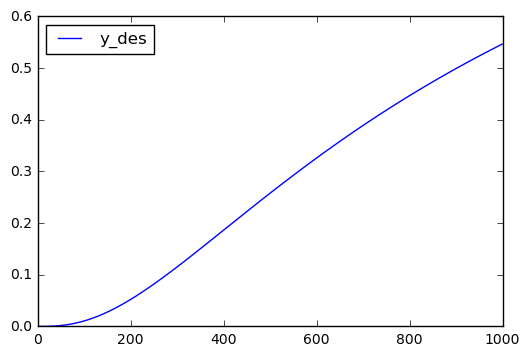

In [8]:
y_des, dy_des, ddy_des = d.learn(y_des=Y.T)
plt.figure('y_des')
plt.plot(y_track, label='y_des')
plt.legend(loc='upper left')
plt.show()

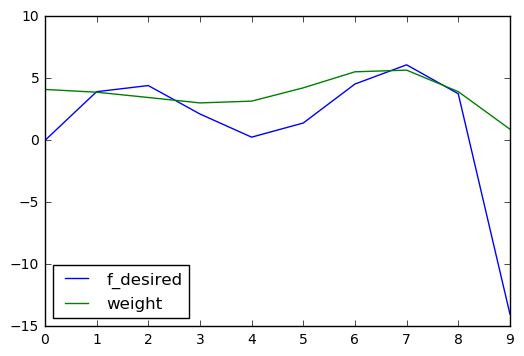

In [9]:
each = int(1/(d.bfs * d.dt))
f_desired = d.f_desired[::each]

plt.figure('f_desired')
plt.plot(f_desired, label='f_desired')
plt.plot(d.w.T, label='weight')
plt.legend(loc='lower left')
plt.show()

In [10]:
each = int(1/(d.bfs * d.dt))
print each

100
